In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
wine = load_wine()

In [3]:
data, feature_names, target = wine.data, wine.feature_names, wine.target

In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [5]:
df = pd.DataFrame(data, columns=feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [6]:
x_lable='magnesium'
y_lable='proanthocyanins'
two_features_df = df[[x_lable, y_lable]]
two_features_df

,magnesium,proanthocyanins
0,1.913905,1.224884
1,0.018145,-0.544721
2,0.088358,2.135968
3,0.930918,1.032155
4,1.281985,0.401404
...,...,...
173,-0.332922,-0.930179
174,0.158572,-0.316950
175,1.422412,-0.422075
176,1.422412,-0.229346


In [7]:
def make_cluster(dfc, num_k):
    model = KMeans(n_clusters=num_k, init='k-means++', max_iter=20, n_init=1, verbose =0)
    model.fit(dfc)
    dfc['class'] = model.fit_predict(dfc)
    return dfc 

In [8]:
def draw_cluster(dfc, x_lable, y_lable):
    fig, ax = plt.subplots(figsize=(10, 7))        
    legend = []
    ax.set_xlabel(x_lable)             
    ax.set_ylabel(y_lable)  
    plt.title('Кластеризация')
    for c, rows in dfc.groupby('class'):
        plt.scatter(rows[x_lable], rows[y_lable], s = 100)
        legend.append("Cluster=%s" % c)
    plt.legend(legend, loc="upper left")
    plt.grid()
    plt.show()

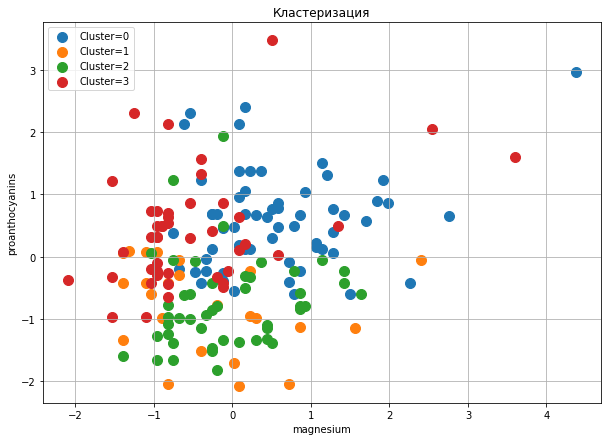

In [9]:
draw_cluster(make_cluster(df,4), x_lable, y_lable)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


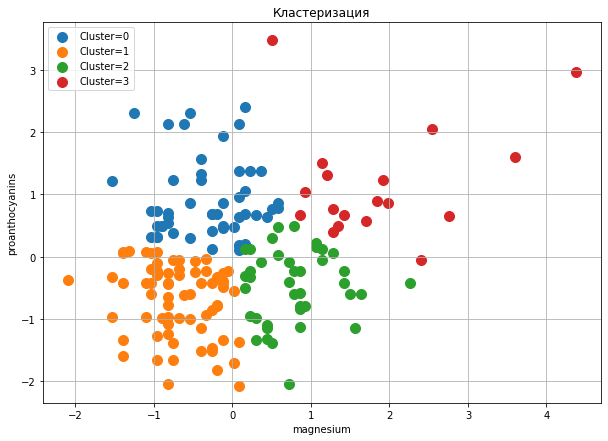

In [10]:
draw_cluster(make_cluster(two_features_df,4), x_lable, y_lable)